In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('C:\\Users\\DELL\\Desktop\\heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.isnull().sum()


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [ ]:
# We will catagorize our data and create the EDA

In [7]:
a=['age','trtbps','chol','thalachh','oldpeak']
b=['sex','cp','fbs','restecg','exng','slp','caa','thall']

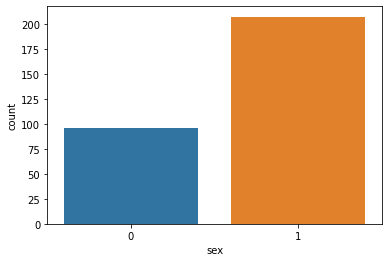

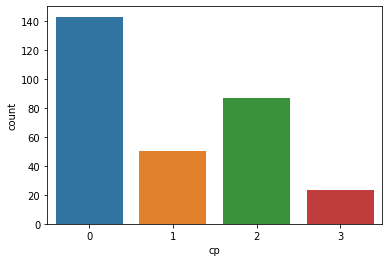

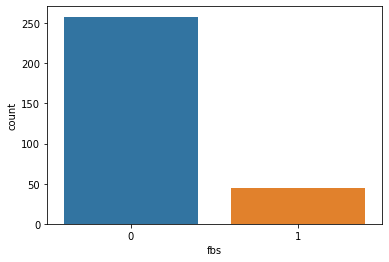

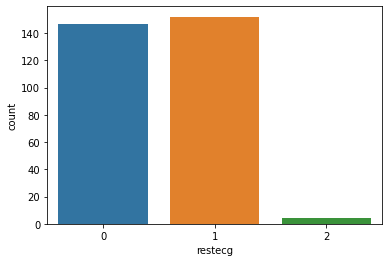

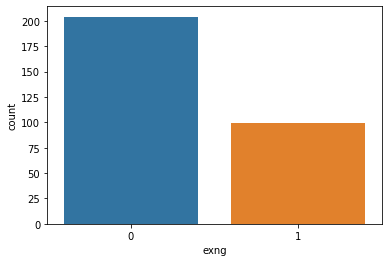

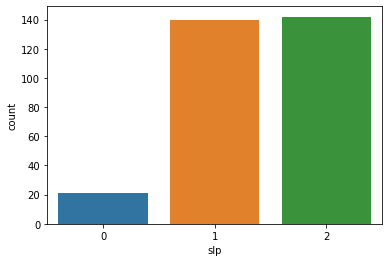

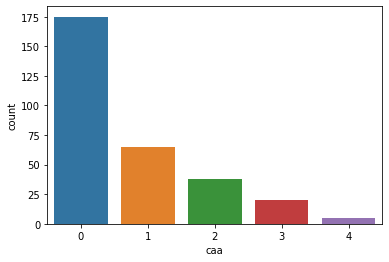

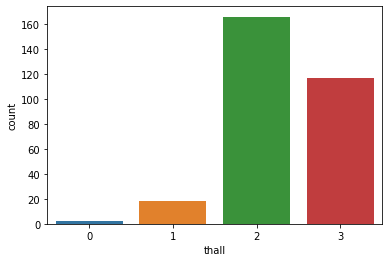

In [8]:
for i in b:
 sns.countplot(x=i,data=df)
 plt.show()


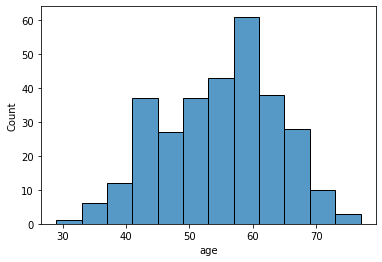

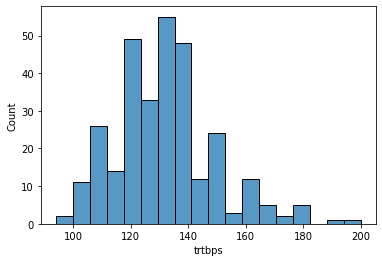

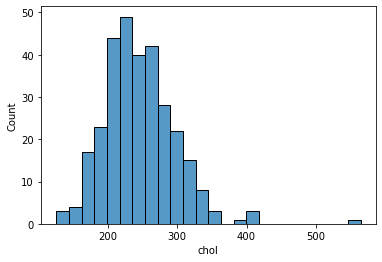

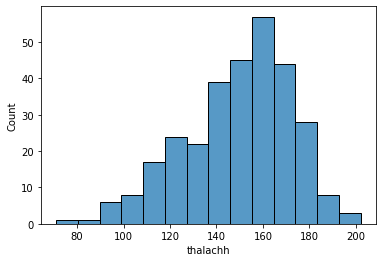

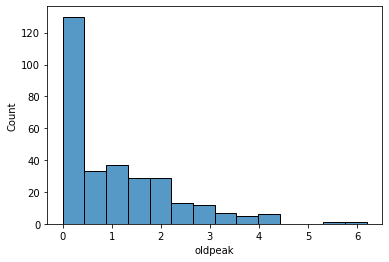

In [9]:
for i in a:
 sns.histplot(x=i,data=df)
 plt.show()

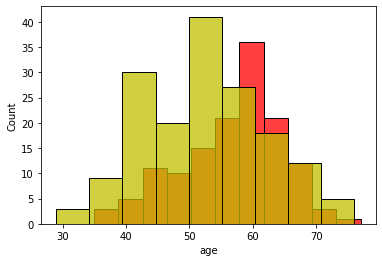

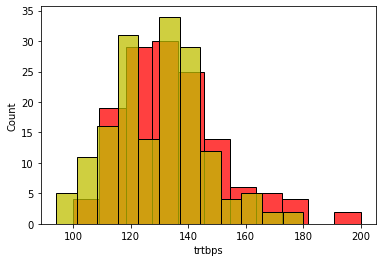

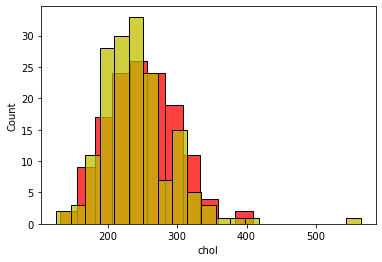

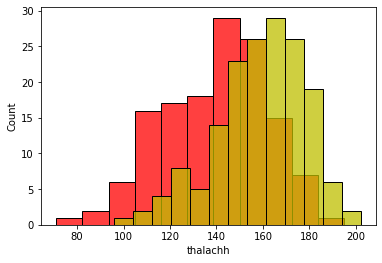

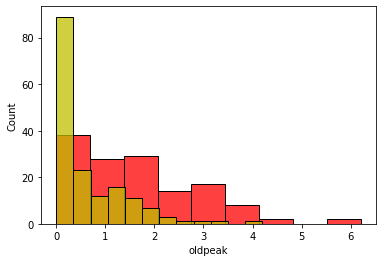

In [10]:
for i in a:
 sns.histplot(x=df[i][df['output']==0],color='r')
 sns.histplot(x=df[i][df['output']==1],color='y')
 plt.show()

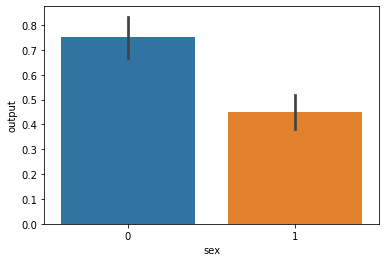

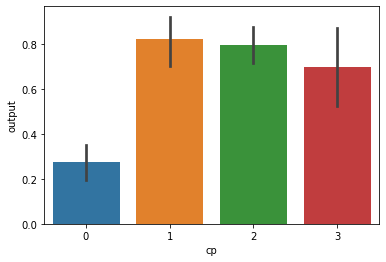

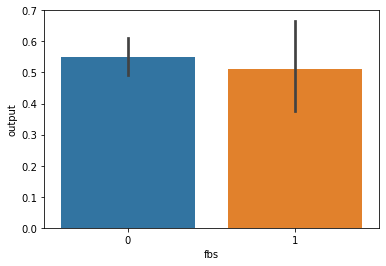

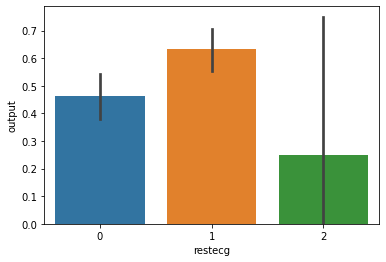

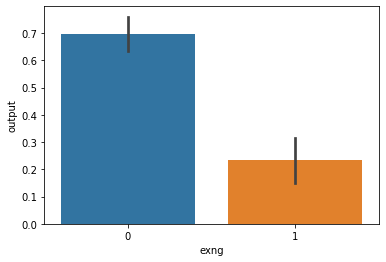

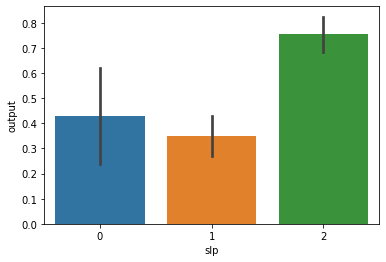

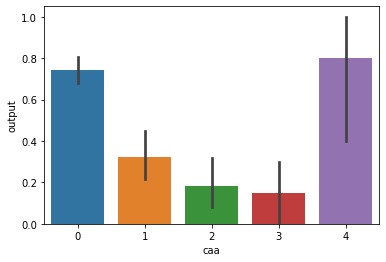

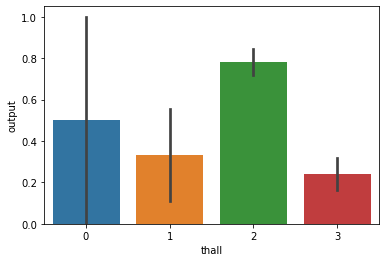

In [11]:
for i in b:
 sns.barplot(x=i,y="output",data=df)
 plt.show()

In [65]:
corr=df.corr()
corr.nlargest(13,'output')['output']

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
Name: output, dtype: float64

In [12]:
x=df.drop('output',axis=1)
y=df['output']
x.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [13]:
# Now splitting our dta into train and test

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)

In [15]:
# Now lets import our 1st model (Logistic Regression)

In [16]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
from sklearn.compose import ColumnTransformer

In [19]:
encoder=ColumnTransformer([('sc',StandardScaler(),[3,4,7])],remainder='passthrough')
newdata=encoder.fit_transform(x)

In [20]:
type(newdata)


numpy.ndarray

In [21]:
pd.DataFrame(newdata).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.763956,-0.256334,0.015443,63.0,1.0,3.0,1.0,0.0,0.0,2.3,0.0,0.0,1.0
1,-0.092738,0.072199,1.633471,37.0,1.0,2.0,0.0,1.0,0.0,3.5,0.0,0.0,2.0
2,-0.092738,-0.816773,0.977514,41.0,0.0,1.0,0.0,0.0,0.0,1.4,2.0,0.0,2.0
3,-0.663867,-0.198357,1.239897,56.0,1.0,1.0,0.0,1.0,0.0,0.8,2.0,0.0,2.0
4,-0.663867,2.082050,0.583939,57.0,0.0,0.0,0.0,1.0,1.0,0.6,2.0,0.0,2.0


In [22]:
model.fit(xtrain,ytrain)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
ypred=model.predict(xtest)


In [25]:
ypred

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [ ]:
# Now lets check our accuracy

In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.7868852459016393


In [ ]:
# The accuracy using Logistic Regression is 78.6%

In [ ]:
# now lets import 2nd  model (KNN )

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(xtrain,ytrain)

KNeighborsClassifier()

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
predict=model.predict(xtest)

In [31]:
print(confusion_matrix(ytest,predict))


[[16 11]
 [13 21]]


In [32]:
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57        27
           1       0.66      0.62      0.64        34

    accuracy                           0.61        61
   macro avg       0.60      0.61      0.60        61
weighted avg       0.61      0.61      0.61        61



In [ ]:
# now lets check with(Kmeans)

In [33]:
k=range(2,10)

In [34]:
from sklearn.cluster import KMeans


In [35]:
distance=[]
for i in k:
 algo=KMeans(n_clusters=i)
 algo.fit(df)
 distance.append(algo.inertia_)

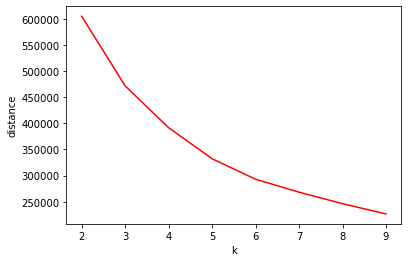

In [36]:
plt.plot(k,distance,color='r')
plt.xlabel('k')
plt.ylabel('distance')
plt.show()


In [37]:
model=KMeans(n_clusters=6,n_init=2000)
model.fit(df)

KMeans(n_clusters=6, n_init=2000)

In [38]:
model.labels_

array([0, 0, 5, 0, 3, 4, 3, 0, 5, 5, 0, 2, 0, 4, 3, 0, 3, 4, 0, 0, 0, 0,
       0, 2, 5, 3, 5, 4, 1, 5, 5, 4, 5, 2, 4, 5, 3, 0, 2, 3, 3, 0, 5, 2,
       3, 3, 0, 0, 4, 0, 0, 3, 0, 5, 0, 5, 5, 0, 5, 3, 2, 3, 5, 4, 5, 5,
       0, 0, 5, 5, 0, 0, 5, 0, 5, 0, 0, 0, 5, 0, 0, 3, 3, 3, 2, 1, 2, 5,
       5, 2, 0, 5, 0, 3, 4, 4, 1, 0, 3, 0, 0, 2, 5, 0, 5, 4, 2, 0, 0, 0,
       3, 5, 3, 5, 0, 5, 5, 5, 5, 0, 3, 0, 0, 0, 5, 5, 4, 3, 5, 2, 5, 0,
       3, 0, 3, 0, 4, 4, 4, 2, 3, 3, 5, 0, 4, 2, 0, 0, 0, 5, 0, 4, 0, 2,
       0, 4, 0, 5, 0, 0, 0, 3, 5, 5, 5, 2, 4, 0, 0, 5, 2, 0, 3, 0, 4, 4,
       0, 3, 4, 2, 3, 4, 3, 0, 2, 3, 0, 2, 0, 5, 3, 4, 4, 2, 5, 3, 0, 0,
       2, 0, 5, 2, 2, 2, 4, 0, 0, 0, 4, 5, 0, 2, 4, 3, 0, 3, 2, 3, 2, 0,
       1, 4, 3, 2, 2, 4, 2, 4, 3, 3, 0, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2,
       4, 2, 4, 0, 1, 2, 3, 2, 2, 0, 2, 3, 2, 3, 2, 4, 0, 0, 0, 0, 2, 0,
       4, 4, 3, 4, 2, 2, 0, 0, 2, 0, 2, 5, 4, 2, 3, 4, 3, 5, 4, 0, 4, 3,
       5, 0, 3, 4, 5, 3, 0, 4, 4, 4, 4, 4, 2, 2, 4,

In [39]:
np.unique(model.labels_)


array([0, 1, 2, 3, 4, 5])

In [40]:
c=model.cluster_centers_
c

array([[ 5.26043956e+01,  7.14285714e-01,  1.09890110e+00,
         1.29329670e+02,  2.42142857e+02,  1.42857143e-01,
         5.38461538e-01,  1.61956044e+02,  2.30769231e-01,
         7.96703297e-01,  1.48351648e+00,  7.14285714e-01,
         2.30769231e+00,  6.48351648e-01],
       [ 6.26000000e+01, -1.11022302e-16,  8.00000000e-01,
         1.35800000e+02,  4.38200000e+02,  2.00000000e-01,
        -1.11022302e-16,  1.55600000e+02,  2.00000000e-01,
         1.90000000e+00,  1.20000000e+00,  1.20000000e+00,
         2.60000000e+00,  6.00000000e-01],
       [ 5.96400000e+01,  7.40000000e-01,  8.20000000e-01,
         1.37460000e+02,  2.65620000e+02,  1.80000000e-01,
         4.00000000e-01,  1.24400000e+02,  5.40000000e-01,
         1.44400000e+00,  1.08000000e+00,  1.00000000e+00,
         2.48000000e+00,  3.00000000e-01],
       [ 5.56785714e+01,  5.71428571e-01,  8.57142857e-01,
         1.35178571e+02,  3.10285714e+02,  1.42857143e-01,
         5.17857143e-01,  1.53857143e+02,  3.

In [41]:
from sklearn.metrics import silhouette_score

In [42]:
print(silhouette_score(df,model.labels_) )

0.2655469766246014


In [43]:
# The accuracy of the model is very less (26.5%).So we will not introduce this model

In [ ]:
#Lets Introduce our next model (Decision Tree)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)

In [46]:
from sklearn.tree import DecisionTreeClassifier


In [47]:
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)


In [48]:
ypred


array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [49]:
from sklearn.metrics import confusion_matrix, classification_report


In [50]:
print(confusion_matrix(ytest,ypred))


[[16  8]
 [ 5 32]]


In [51]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71        24
           1       0.80      0.86      0.83        37

    accuracy                           0.79        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.79      0.79      0.78        61



In [52]:
# The accuracy is 79%

In [53]:
# Our next model is Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
model=RandomForestClassifier(n_estimators=5,max_depth=3,max_leaf_nodes=4,max_features=5)

In [56]:
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)


In [57]:
from sklearn.metrics import confusion_matrix, classification_report

In [58]:
print(confusion_matrix(ytest,ypred))

[[19  5]
 [ 5 32]]


In [59]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        24
           1       0.86      0.86      0.86        37

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [60]:
# Here the accuracy with Random Forest is 84%

In [61]:
#Lets import our next Model (S.V.C)

In [63]:
from sklearn.svm import SVC

In [64]:
model=SVC()
model.fit(xtrain,ytrain)

SVC()

In [66]:
ypred=model.predict(xtest)

In [67]:
ypred

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

In [69]:
print(confusion_matrix(ypred,ytest))

[[14  9]
 [10 28]]


In [70]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.58      0.61      0.60        23
           1       0.76      0.74      0.75        38

    accuracy                           0.69        61
   macro avg       0.67      0.67      0.67        61
weighted avg       0.69      0.69      0.69        61



In [ ]:
# Using SVC we have 69% accuracy

In [ ]:
# The highest accuracy we have is 84% using Random Forest. So for this data we will use the Random Forest Model.